# DSP 10  Final Project- Zomato Delivery Time Prediction#

### The objective of the project is to increase the accuracy of the model to analyze and predict Predicting Food Delivery Time.

In [1]:
#importing all necessary files
import os
import pandas as pd
import numpy as np
import warnings
import re
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model as lm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,ADASYN

In [2]:
#importing training file
data1 = pd.read_excel(r'E:\dsp imarticus\project_dt\Data_Train.xlsx')

# pls change the file location

In [3]:
#importing testing file
data2 = pd.read_excel(r'E:\dsp imarticus\project_dt\Data_Test.xlsx')

# pls change the file location

### Joining both the file so that operations can be performed on both the files simultaneously

In [4]:
data3 = pd.concat([data1,data2],sort= False)

In [5]:
data3.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [6]:
data3.shape

(13868, 9)

In [7]:
data3.Average_Cost.unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

### To eliminate ₹ sign

In [8]:
data3["Average_Cost"]= data3["Average_Cost"].str.replace("₹","")

In [9]:
data3["Minimum_Order"]= data3["Minimum_Order"].str.replace("₹","")

In [10]:
data3["Delivery_Time"]= data3["Delivery_Time"].str.replace(" minutes","")

### Extracting city from address

In [11]:
data3['City.Pune'] = data3['Location'].apply(lambda x: 'Pune' if 'Pune' in x else None)
data3['City.Kolkata'] = data3['Location'].apply(lambda x: 'Kolkata' if 'Kolkata' in x else None)
data3['City.Mumbai'] = data3['Location'].apply(lambda x: 'Mumbai' if 'Mumbai' in x else None)
data3['City.Bangalore'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Bangalore' in x else None)
data3['City.Delhi'] = data3['Location'].apply(lambda x: 'Delhi' if 'Delhi' in x else None)
data3['City.Hyderabad'] = data3['Location'].apply(lambda x: 'Hyderabad' if 'Hyderabad' in x else None)
data3['City.Noida'] = data3['Location'].apply(lambda x: 'Noida' if 'Noida' in x else None)
data3['City.Gurgaon'] = data3['Location'].apply(lambda x: 'Gurgaon' if 'Gurgaon' in x else None)
data3['City.Majestic'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Majestic' in x else None)
data3['City.Marathalli'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Marathalli' in x else None)
data3['City.Electronic'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Electronic' in x else None)
data3['City.Gurgoan'] = data3['Location'].apply(lambda x: 'Gurgaon' if 'Gurgoan' in x else None)
data3['City.Whitefield'] = data3['Location'].apply(lambda x: 'Bangalore' if 'Whitefield' in x else None)

data3['City'] = data3['City.Pune'].map(str)+data3['City.Kolkata'].map(str)+data3['City.Mumbai'].map(str)+data3['City.Bangalore'].map(str)+data3['City.Delhi'].map(str)+data3['City.Hyderabad'].map(str)+data3['City.Noida'].map(str)+data3['City.Gurgaon'].map(str)+data3['City.Majestic'].map(str)+data3['City.Marathalli'].map(str)+data3['City.Electronic'].map(str)+data3['City.Gurgoan'].map(str)+data3['City.Whitefield'].map(str)

data3['City'] = data3['City'].apply(lambda x: x.replace('None',''))


In [12]:
data3.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City.Pune,...,City.Delhi,City.Hyderabad,City.Noida,City.Gurgaon,City.Majestic,City.Marathalli,City.Electronic,City.Gurgoan,City.Whitefield,City
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,Pune,...,None,None,None,None,None,None,None,None,None,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30,None,...,None,None,None,None,None,Bangalore,None,None,None,Bangalore
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,None,...,None,None,None,None,None,None,None,None,None,Mumbai
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,None,...,None,None,Noida,None,None,None,None,None,None,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65,None,...,None,None,None,None,None,None,None,None,Bangalore,Bangalore


In [13]:
data5 = data3[['Restaurant','Location','City','Cuisines','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']]


In [14]:
data5

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
1,ID_2882,"Sector 3, Marathalli",Bangalore,"Ice Cream, Desserts",100,50,3.5,11,4,30
2,ID_1595,Mumbai Central,Mumbai,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
3,ID_5929,"Sector 1, Noida",Noida,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,"Cafe, Beverages",200,99,3.2,521,235,65
5,ID_5221,"Rmz Centennial, I Gate, Whitefield",Bangalore,"South Indian, North Indian, Chinese",150,50,3.8,46,18,30
6,ID_3777,Mumbai Central,Mumbai,"Beverages, Fast Food",150,50,3.7,108,31,30
7,ID_745,Delhi University-GTB Nagar,Delhi,"Chinese, Thai, Asian",650,50,4.0,1731,1235,45
8,ID_2970,Delhi University-GTB Nagar,Delhi,"Mithai, Street Food",100,50,3.9,110,26,30
9,ID_3474,"Sector 1, Noida",Noida,"Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562,294,65


In [15]:
data5.to_csv('Citywisedata.csv') 

In [16]:
#function to count number of cuisines in particular restaurant
def countoc(s):
    a=s.split(',')
    return len(a)

In [17]:
countoc('Fast Food, Rolls, Burger, Salad, Wraps')

5

In [18]:
data5['Count Cuisine']=data5['Cuisines'].apply(lambda x:countoc(x))


In [19]:
data5.head()

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Count Cuisine
0,ID_6321,"FTI College, Law College Road, Pune",Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,5
1,ID_2882,"Sector 3, Marathalli",Bangalore,"Ice Cream, Desserts",100,50,3.5,11,4,30,2
2,ID_1595,Mumbai Central,Mumbai,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,3
3,ID_5929,"Sector 1, Noida",Noida,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,3
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,"Cafe, Beverages",200,99,3.2,521,235,65,2


In [20]:
data5

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Count Cuisine
0,ID_6321,"FTI College, Law College Road, Pune",Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,5
1,ID_2882,"Sector 3, Marathalli",Bangalore,"Ice Cream, Desserts",100,50,3.5,11,4,30,2
2,ID_1595,Mumbai Central,Mumbai,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,3
3,ID_5929,"Sector 1, Noida",Noida,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,3
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,"Cafe, Beverages",200,99,3.2,521,235,65,2
5,ID_5221,"Rmz Centennial, I Gate, Whitefield",Bangalore,"South Indian, North Indian, Chinese",150,50,3.8,46,18,30,3
6,ID_3777,Mumbai Central,Mumbai,"Beverages, Fast Food",150,50,3.7,108,31,30,2
7,ID_745,Delhi University-GTB Nagar,Delhi,"Chinese, Thai, Asian",650,50,4.0,1731,1235,45,3
8,ID_2970,Delhi University-GTB Nagar,Delhi,"Mithai, Street Food",100,50,3.9,110,26,30,2
9,ID_3474,"Sector 1, Noida",Noida,"Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562,294,65,6


In [21]:
data5.dtypes

Restaurant       object
Location         object
City             object
Cuisines         object
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
Count Cuisine     int64
dtype: object

### Converting non numerical values in numerical column to NaN

In [22]:
cols=['Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']

In [23]:
data5[cols] = data5[cols].apply(pd.to_numeric, errors='coerce')

In [24]:
data5.dtypes

Restaurant        object
Location          object
City              object
Cuisines          object
Average_Cost     float64
Minimum_Order      int64
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time    float64
Count Cuisine      int64
dtype: object

In [25]:
data5.isna().sum()

Restaurant          0
Location            0
City                0
Cuisines            0
Average_Cost       31
Minimum_Order       0
Rating           2470
Votes            2616
Reviews          2905
Delivery_Time    2774
Count Cuisine       0
dtype: int64

In [26]:
data5.head()

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Count Cuisine
0,ID_6321,"FTI College, Law College Road, Pune",Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,30.0,5
1,ID_2882,"Sector 3, Marathalli",Bangalore,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,30.0,2
2,ID_1595,Mumbai Central,Mumbai,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,65.0,3
3,ID_5929,"Sector 1, Noida",Noida,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,30.0,3
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,"Cafe, Beverages",200.0,99,3.2,521.0,235.0,65.0,2


### Imputing NaN values with median value

In [27]:
data5['Average_Cost']=data5['Average_Cost'].fillna(data5['Average_Cost'].median())
data5['Rating']=data5['Rating'].fillna(data5['Rating'].median())
data5['Votes']=data5['Votes'].fillna(data5['Votes'].median())
data5['Reviews']=data5['Reviews'].fillna(data5['Reviews'].median())

In [28]:
data5.isna().sum()

Restaurant          0
Location            0
City                0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
Count Cuisine       0
dtype: int64

In [29]:
data5=data5[['Restaurant','Location','City','Cuisines','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Count Cuisine','Delivery_Time']]

In [30]:
data5.head()

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Count Cuisine,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,5,30.0
1,ID_2882,"Sector 3, Marathalli",Bangalore,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,2,30.0
2,ID_1595,Mumbai Central,Mumbai,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,3,65.0
3,ID_5929,"Sector 1, Noida",Noida,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,3,30.0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,"Cafe, Beverages",200.0,99,3.2,521.0,235.0,2,65.0


In [31]:
data5.to_csv('Cleaneddata.csv') 

In [32]:
# in each column of dataframe
uniqueValues =pd.DataFrame(data5.nunique())
 
print('Count of unique values in each column :')
print(uniqueValues)


Count of unique values in each column :
                  0
Restaurant     8661
Location         35
City              8
Cuisines       2392
Average_Cost     19
Minimum_Order    20
Rating           29
Votes          1180
Reviews         810
Count Cuisine     8
Delivery_Time     7


In [33]:
data5.head()

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Count Cuisine,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200.0,50,3.5,12.0,4.0,5,30.0
1,ID_2882,"Sector 3, Marathalli",Bangalore,"Ice Cream, Desserts",100.0,50,3.5,11.0,4.0,2,30.0
2,ID_1595,Mumbai Central,Mumbai,"Italian, Street Food, Fast Food",150.0,50,3.6,99.0,30.0,3,65.0
3,ID_5929,"Sector 1, Noida",Noida,"Mughlai, North Indian, Chinese",250.0,99,3.7,176.0,95.0,3,30.0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,"Cafe, Beverages",200.0,99,3.2,521.0,235.0,2,65.0


In [34]:
data1.shape

(11094, 9)

### Getting Train data before joing from cleaned data

In [35]:
train=data5[:11094]

### EDA

Text(0.5, 1.0, 'City vs Number of Restaurant')

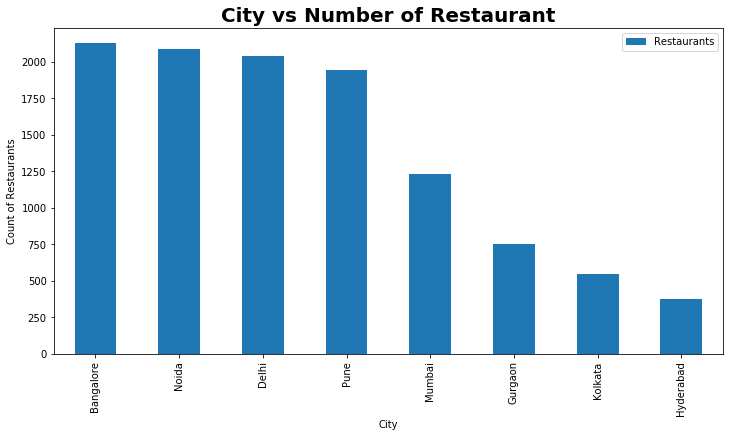

In [36]:
# City Wise Distribution of Resturant Records
plt.figure(figsize = (12,6))
ax = train.City.value_counts()[:20].plot(kind = 'bar')
ax.legend(['Restaurants'])
plt.xlabel("City")
plt.ylabel("Count of Restaurants")
plt.title("City vs Number of Restaurant",fontsize =20, weight = 'bold')

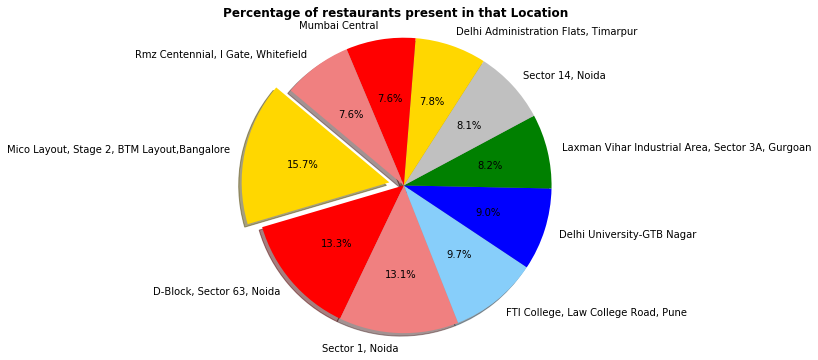

In [37]:
# Location Wise Distribution of Resturant Records
plt.figure(figsize = (12,6))
names = train['Location'].value_counts()[:10].index
values = train['Location'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  

plt.pie(values, explode=explode, labels=names, colors= colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that Location", weight = 'bold')
plt.show()

Text(0.5, 0, 'Delivery_Time')

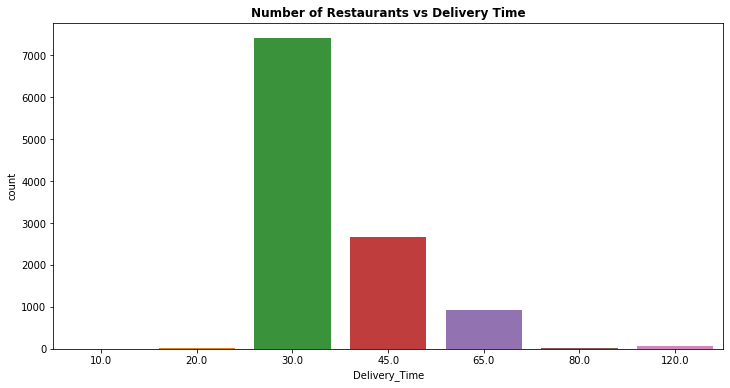

In [38]:
plt.figure(figsize=(12,6))
ax1= sns.countplot(train['Delivery_Time'])
plt.title('Number of Restaurants vs Delivery Time', weight='bold')
plt.xlabel('Delivery_Time')

Text(0.5, 1.0, 'Rating vs Delivery Time distribution')

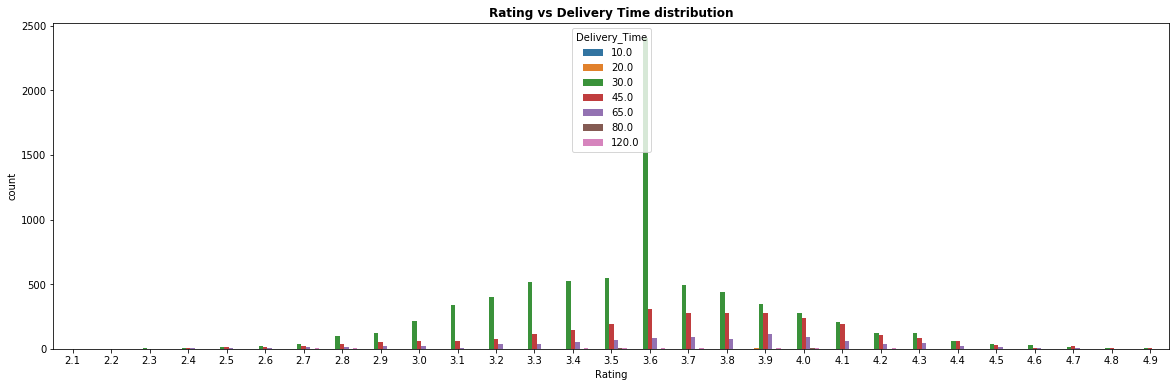

In [39]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x="Rating", hue="Delivery_Time", data=train)
plt.title('Rating vs Delivery Time distribution', weight='bold')

Text(0.5, 1.0, 'City vs Delivery Time distribution')

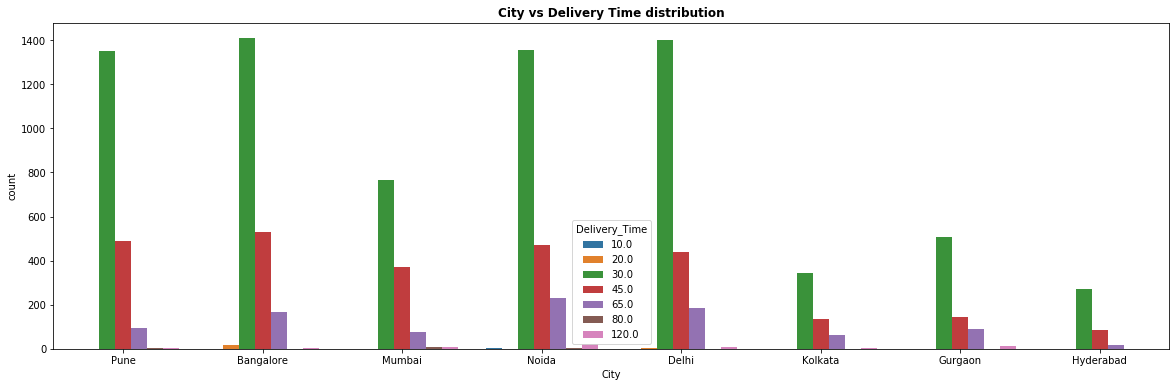

In [40]:
plt.figure(figsize=(20,6))
ax4 = sns.countplot(x="City", hue="Delivery_Time", data=train)
plt.title('City vs Delivery Time distribution', weight='bold')

Text(0.5, 1, 'Votes vs Delivery Time distribution')

<Figure size 1440x432 with 0 Axes>

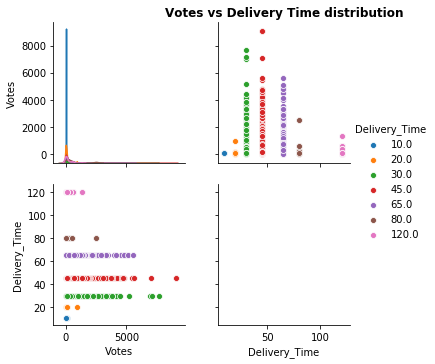

In [41]:
plt.figure(figsize=(20,6))
ax5 = sns.pairplot(train, vars=["Votes", "Delivery_Time"], hue = "Delivery_Time" )
plt.title('Votes vs Delivery Time distribution', weight='bold')

In [42]:
### This EDA shows us that there is distinct classification of delivery time

Text(0.5, 1, 'Reviews vs Delivery Time distribution')

<Figure size 14400x432 with 0 Axes>

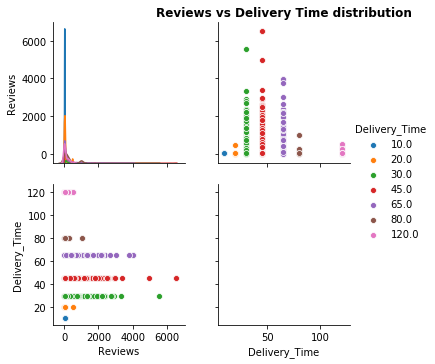

In [43]:
plt.figure(figsize=(200,6))
ax6 = sns.pairplot(train, vars=["Reviews", "Delivery_Time"], hue = "Delivery_Time" )
plt.title('Reviews vs Delivery Time distribution', weight='bold')

In [44]:
data1.tail()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes
11092,ID_4115,"Sector 3, Marathalli",North Indian,₹100,₹50,3.1,24,9,30 minutes
11093,ID_4417,"Sector 63A,Gurgaon",North Indian,₹100,₹50,NEW,-,-,30 minutes


In [45]:
train.tail()

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Count Cuisine,Delivery_Time
11089,ID_8067,"BTM Layout 1, Electronic City",Bangalore,"Tibetan, Chinese, Continental, Momos",250.0,50,4.2,326.0,189.0,4,30.0
11090,ID_4620,"Sector 14, Noida",Noida,Fast Food,100.0,50,3.6,36.0,16.0,1,30.0
11091,ID_3392,Majestic,Bangalore,"South Indian, Chinese, North Indian",100.0,50,3.5,45.0,18.0,3,30.0
11092,ID_4115,"Sector 3, Marathalli",Bangalore,North Indian,100.0,50,3.1,24.0,9.0,1,30.0
11093,ID_4417,"Sector 63A,Gurgaon",Gurgaon,North Indian,100.0,50,3.6,63.0,26.0,1,30.0


### Getting Test data before joing from cleaned data

In [46]:
test=data5[11094:]

In [47]:
data2.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [48]:
test.head()

,Restaurant,Location,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Count Cuisine,Delivery_Time
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore",Bangalore,"North Indian, Chinese, Assamese",350.0,50,4.2,361.0,225.0,3,NaN
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore",Bangalore,"Biryani, Kebab",100.0,50,3.6,63.0,26.0,2,NaN
2,ID_4620,"Sector 1, Noida",Noida,Fast Food,100.0,50,3.6,36.0,16.0,1,NaN
3,ID_5470,"Babarpur, New Delhi, Delhi",Delhi,"Mithai, North Indian, Chinese, Fast Food, Sout...",200.0,50,3.6,66.0,33.0,5,NaN
4,ID_3249,"Sector 1, Noida",Noida,"Chinese, Fast Food",150.0,50,2.9,38.0,14.0,2,NaN


In [49]:
train.isna().sum()

Restaurant       0
Location         0
City             0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Count Cuisine    0
Delivery_Time    0
dtype: int64

### Generating dummy variables for one hot encoding

In [50]:

X=train[['City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Count Cuisine']]
y=train['Delivery_Time']
X = pd.get_dummies(data=X, drop_first=True)


### KNN Model

In [51]:

X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=37)
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

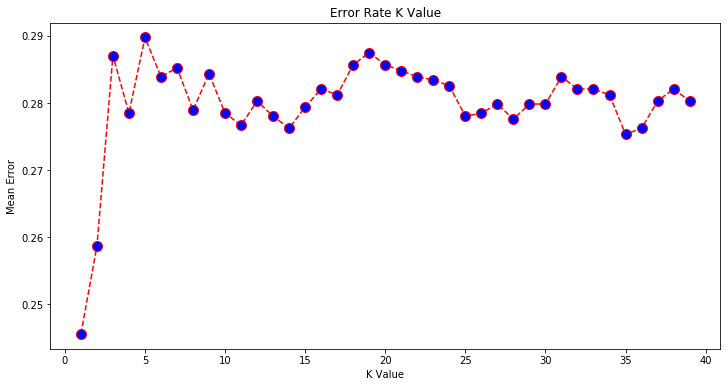

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [53]:
KNN_model = KNeighborsClassifier(n_neighbors=35)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
train_score=KNN_model.score(X_train,y_train)
test_score=KNN_model.score(X_test,y_test)
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.7246507435781884 Train Score 0.7171830985915493 


In [54]:
KNN_Summary = ("Test Score {} Train Score {} ".format(test_score,train_score))
print("KNN_Summary",KNN_Summary)

KNN_Summary Test Score 0.7246507435781884 Train Score 0.7171830985915493 


In [55]:
KNN_cm = confusion_matrix(y, KNN_model.predict(X))
KNN_cm

array([[   0,    0,    4,    0,    0,    0,    0],
       [   0,    0,   19,    1,    0,    0,    0],
       [   0,    0, 6702,  697,    7,    0,    0],
       [   0,    0, 1389, 1262,   14,    0,    0],
       [   0,    0,  457,  457,    9,    0,    0],
       [   0,    0,    6,    8,    0,    0,    0],
       [   0,    0,   38,   24,    0,    0,    0]], dtype=int64)

In [56]:
print(classification_report(y, KNN_model.predict(X)))

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         4
        20.0       0.00      0.00      0.00        20
        30.0       0.78      0.90      0.84      7406
        45.0       0.52      0.47      0.49      2665
        65.0       0.30      0.01      0.02       923
        80.0       0.00      0.00      0.00        14
       120.0       0.00      0.00      0.00        62

    accuracy                           0.72     11094
   macro avg       0.23      0.20      0.19     11094
weighted avg       0.67      0.72      0.68     11094



####  Model is generalized with 72% accuracy. However, Precision and Recall for some classes are 0. 

### XGBoost Classifier Model

In [57]:
for i in range(1,50):
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=i)
    XGB=XGBClassifier(learning_rate=0.05)
    XGB.fit(X_train,y_train)
    train_score=XGB.score(X_train,y_train)
    test_score=XGB.score(X_test,y_test)
    if test_score > train_score:
        print("Test Score {} Train Score {} Random {}".format(test_score,train_score,i))

Test Score 0.7305092383956737 Train Score 0.7302535211267606 Random 8
Test Score 0.7323118521856692 Train Score 0.7301408450704225 Random 9
Test Score 0.7381703470031545 Train Score 0.7310422535211267 Random 12
Test Score 0.7327625056331681 Train Score 0.7274366197183099 Random 14
Test Score 0.7341144659756648 Train Score 0.7332957746478873 Random 16
Test Score 0.7341144659756648 Train Score 0.7302535211267606 Random 23
Test Score 0.7296079315006759 Train Score 0.7292394366197184 Random 25
Test Score 0.7314105452906715 Train Score 0.7290140845070423 Random 26
Test Score 0.733213159080667 Train Score 0.7284507042253521 Random 32
Test Score 0.733213159080667 Train Score 0.7293521126760564 Random 36
Test Score 0.7458314556106355 Train Score 0.7289014084507043 Random 37
Test Score 0.7314105452906715 Train Score 0.7299154929577465 Random 41
Test Score 0.7381703470031545 Train Score 0.7309295774647887 Random 42


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=37)
XGB=XGBClassifier(learning_rate=0.05)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
train_score=XGB.score(X_train,y_train)
test_score=XGB.score(X_test,y_test)

In [60]:
XGBC_Summary = ("Test Score {} Train Score {} ".format(test_score,train_score))
print("XGBC_Summary",XGBC_Summary)

XGBC_Summary Test Score 0.7458314556106355 Train Score 0.7289014084507043 


In [61]:
XGB_cm = confusion_matrix(y, XGB.predict(X))
XGB_cm

array([[   0,    0,    4,    0,    0,    0,    0],
       [   0,    0,   19,    1,    0,    0,    0],
       [   0,    0, 6661,  743,    2,    0,    0],
       [   0,    0, 1211, 1450,    4,    0,    0],
       [   0,    0,  379,  537,    7,    0,    0],
       [   0,    0,    7,    2,    0,    5,    0],
       [   0,    0,   39,   22,    0,    0,    1]], dtype=int64)

In [62]:
print(classification_report(y, XGB.predict(X)))

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         4
        20.0       0.00      0.00      0.00        20
        30.0       0.80      0.90      0.85      7406
        45.0       0.53      0.54      0.54      2665
        65.0       0.54      0.01      0.01       923
        80.0       1.00      0.36      0.53        14
       120.0       1.00      0.02      0.03        62

    accuracy                           0.73     11094
   macro avg       0.55      0.26      0.28     11094
weighted avg       0.71      0.73      0.70     11094



#### Generalized model with 74% accuracy, However precision and recall for only few classes are high for some it is 0.

### Random Forest Classifier

In [63]:
RFC=RandomForestClassifier(random_state = 37,n_estimators = 500)
RFC.fit(X_train,y_train)
train_score=RFC.score(X_train,y_train)
test_score=RFC.score(X_test,y_test)
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.8039657503379901 Train Score 0.9897464788732394 


In [64]:
RFC_NG_Summary = ("Test Score {} Train Score {} ".format(test_score,train_score))
print("RFC_Summary",RFC_NG_Summary)

RFC_Summary Test Score 0.8039657503379901 Train Score 0.9897464788732394 


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=37)
RFC=RandomForestClassifier(random_state = 37,
                                  n_estimators = 500)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

In [66]:
RFC_cm = confusion_matrix(y, RFC.predict(X))
RFC_cm

array([[   2,    0,    2,    0,    0,    0,    0],
       [   0,   17,    3,    0,    0,    0,    0],
       [   0,    0, 7278,  114,   12,    0,    2],
       [   0,    0,  218, 2426,   21,    0,    0],
       [   0,    0,   74,   70,  778,    0,    1],
       [   0,    0,    0,    2,    0,   12,    0],
       [   0,    0,    4,    3,    0,    0,   55]], dtype=int64)

In [67]:
print(classification_report(y, RFC.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       1.00      0.85      0.92        20
        30.0       0.96      0.98      0.97      7406
        45.0       0.93      0.91      0.92      2665
        65.0       0.96      0.84      0.90       923
        80.0       1.00      0.86      0.92        14
       120.0       0.95      0.89      0.92        62

    accuracy                           0.95     11094
   macro avg       0.97      0.83      0.89     11094
weighted avg       0.95      0.95      0.95     11094



#### Non Generalized model with 80% accuracy, High precision and recall for all classes is predicted.. 

### Support Vector Classifier

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=37)
SVCmodel = SVC(gamma=0.8)
SVCmodel.fit(X_train,y_train)
    
test_score = SVCmodel.score(X_test,y_test)
train_score = SVCmodel.score(X_train,y_train)
    
    
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.7859396124380351 Train Score 0.9793802816901408 


In [69]:
SVC_NG_Summary = ("Test Score {} Train Score {} ".format(test_score,train_score))
print("SVC_NG_Summary",SVC_NG_Summary)

SVC_NG_Summary Test Score 0.7859396124380351 Train Score 0.9793802816901408 


In [70]:
SVC_cm = confusion_matrix(y, SVCmodel.predict(X))
SVC_cm

array([[   2,    0,    2,    0,    0,    0,    0],
       [   0,    8,   12,    0,    0,    0,    0],
       [   0,    0, 7400,    5,    0,    0,    1],
       [   0,    0,  435, 2230,    0,    0,    0],
       [   0,    0,  178,    5,  740,    0,    0],
       [   0,    0,    3,    0,    0,   11,    0],
       [   0,    0,   16,    1,    0,    0,   45]], dtype=int64)

In [71]:
print(classification_report(y, SVCmodel.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       1.00      0.40      0.57        20
        30.0       0.92      1.00      0.96      7406
        45.0       1.00      0.84      0.91      2665
        65.0       1.00      0.80      0.89       923
        80.0       1.00      0.79      0.88        14
       120.0       0.98      0.73      0.83        62

    accuracy                           0.94     11094
   macro avg       0.98      0.72      0.82     11094
weighted avg       0.95      0.94      0.94     11094



#### Non generalized model with 94% accuracy. Giving much high precision and recall for every class. 

### Since the dataset is highly imbalanced using SMOTE - SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [72]:
sm = SMOTE(k_neighbors=2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y, test_size=0.2, random_state=37)
X_train2, Y_train2 = sm.fit_resample(X_train2, Y_train2)
np.unique(Y_train2, return_counts=True)

(array([ 10.,  20.,  30.,  45.,  65.,  80., 120.]),
 array([5864, 5864, 5864, 5864, 5864, 5864, 5864], dtype=int64))

In [73]:
SVC_sm = SVC(gamma=0.8)
SVC_sm.fit(X_train2, Y_train2)
test_score = SVC_sm.score(X_test2,Y_test2)
train_score = SVC_sm.score(X_train2,Y_train2)
    
    
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.7030193780982424 Train Score 0.9897680763983628 


In [74]:
SVC_NG_SM_Summary = ("Test Score {} Train Score {} ".format(test_score,train_score))
print("SVC_NG_SM_Summary",SVC_NG_SM_Summary)

SVC_NG_SM_Summary Test Score 0.7030193780982424 Train Score 0.9897680763983628 


In [75]:
SVC_sm_cm = confusion_matrix(y, SVC_sm.predict(X))
SVC_sm_cm

array([[   2,    0,    2,    0,    0,    0,    0],
       [   0,   17,    2,    1,    0,    0,    0],
       [   0,    6, 6882,  430,   76,    1,   11],
       [   0,    2,  128, 2520,   13,    0,    2],
       [   0,    1,   33,  120,  767,    0,    2],
       [   0,    0,    0,    2,    0,   12,    0],
       [   0,    0,    4,    4,    0,    0,   54]], dtype=int64)

In [76]:
print(classification_report(y, SVC_sm.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       0.65      0.85      0.74        20
        30.0       0.98      0.93      0.95      7406
        45.0       0.82      0.95      0.88      2665
        65.0       0.90      0.83      0.86       923
        80.0       0.92      0.86      0.89        14
       120.0       0.78      0.87      0.82        62

    accuracy                           0.92     11094
   macro avg       0.86      0.83      0.83     11094
weighted avg       0.93      0.92      0.93     11094



#### Non-generalized model with 70% accuracy. Precision and Recall over 0.5 for each class

### Using ADASYN

In [77]:
ada = ADASYN(n_neighbors=2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y, test_size=0.2, random_state=37)
X_train2, Y_train2 = ada.fit_resample(X_train2, Y_train2)
np.unique(Y_train2, return_counts=True)

(array([ 10.,  20.,  30.,  45.,  65.,  80., 120.]),
 array([5863, 5860, 5864, 5817, 5628, 5865, 5869], dtype=int64))

In [78]:
ada_SVC = SVC(gamma=0.8)
ada_SVC.fit(X_train2, Y_train2)
test_score = ada_SVC.score(X_test2,Y_test2)
train_score = ada_SVC.score(X_train2,Y_train2)
    
    
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.6962595763857593 Train Score 0.9857969876858166 


In [79]:
SVC_NG_ADA_Summary = ("Test Score {} Train Score {} ".format(test_score,train_score))
print("SVC_NG_ADA_Summary",SVC_NG_ADA_Summary)

SVC_NG_ADA_Summary Test Score 0.6962595763857593 Train Score 0.9857969876858166 


In [80]:
ada_SVC_cm = confusion_matrix(y, ada_SVC.predict(X))
ada_SVC_cm

array([[   2,    0,    2,    0,    0,    0,    0],
       [   0,   17,    2,    1,    0,    0,    0],
       [   0,    6, 6849,  457,   82,    1,   11],
       [   0,    2,  124, 2527,   11,    0,    1],
       [   0,    1,   31,  122,  767,    0,    2],
       [   0,    0,    0,    2,    0,   12,    0],
       [   0,    0,    4,    4,    0,    0,   54]], dtype=int64)

In [81]:
print(classification_report(y, ada_SVC.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       0.65      0.85      0.74        20
        30.0       0.98      0.92      0.95      7406
        45.0       0.81      0.95      0.87      2665
        65.0       0.89      0.83      0.86       923
        80.0       0.92      0.86      0.89        14
       120.0       0.79      0.87      0.83        62

    accuracy                           0.92     11094
   macro avg       0.86      0.83      0.83     11094
weighted avg       0.93      0.92      0.92     11094



#### Non-generalized model with 69% accuracy. Precision and Recall over 0.5 for each class

In [82]:
ada_RCF = RandomForestClassifier(random_state = 37,
                                  n_estimators = 500)
ada_RCF.fit(X_train2, Y_train2)
test_score = ada_RCF.score(X_test2,Y_test2)
train_score = ada_RCF.score(X_train2,Y_train2)
    
    
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.7773771969355565 Train Score 0.9924446842957366 


In [83]:
RCF_NG_ADA_Summary = ("Test Score {} Train Score {} ".format(test_score,train_score))
print("RCF_NG_ADA_Summary",RCF_NG_ADA_Summary)

RCF_NG_ADA_Summary Test Score 0.7773771969355565 Train Score 0.9924446842957366 


In [84]:
ada_RCF_cm = confusion_matrix(y, ada_RCF.predict(X))
ada_RCF_cm

array([[   2,    0,    2,    0,    0,    0,    0],
       [   0,   17,    3,    0,    0,    0,    0],
       [   0,    1, 7132,  192,   79,    0,    2],
       [   0,    0,  168, 2454,   41,    0,    2],
       [   0,    0,   64,   75,  782,    0,    2],
       [   0,    0,    0,    2,    0,   12,    0],
       [   0,    0,    4,    2,    1,    0,   55]], dtype=int64)

In [85]:
print(classification_report(y, ada_RCF.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       0.94      0.85      0.89        20
        30.0       0.97      0.96      0.97      7406
        45.0       0.90      0.92      0.91      2665
        65.0       0.87      0.85      0.86       923
        80.0       1.00      0.86      0.92        14
       120.0       0.90      0.89      0.89        62

    accuracy                           0.94     11094
   macro avg       0.94      0.83      0.87     11094
weighted avg       0.94      0.94      0.94     11094



In [86]:
#### Non-generalized model with 78.3% accuracy. Precision and Recall over 0.5 for each class

### Running model on test data and generating predictions with RFC Non Generalized Model as it is giving the better accuracy precision and recall on test features

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=37)

RFC=RandomForestClassifier(random_state = 37,n_estimators = 500)
RFC.fit(X_train,y_train)

X_final=test[['City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Count Cuisine']]
X_final = pd.get_dummies(data=X_final, drop_first=True)
pred=RFC.predict(X_final)
pred
sub=pd.DataFrame()
sub["Restaurant"]=test["Restaurant"]
sub["Delivery_Time"]=np.round(pred).astype(int)
sub["Delivery_Time"]=sub["Delivery_Time"].astype(str)+" minutes"
sub.to_excel("submission.xlsx",index=False)
sub

,Restaurant,Delivery_Time
0,ID_2842,30 minutes
1,ID_730,30 minutes
2,ID_4620,30 minutes
3,ID_5470,30 minutes
4,ID_3249,30 minutes
5,ID_506,30 minutes
6,ID_8321,45 minutes
7,ID_4559,30 minutes
8,ID_7982,30 minutes
9,ID_2869,30 minutes
